# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [5]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
import sklearn
# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scipy version:", scipy.__version__)
print("SciKit version:", sklearn.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Scipy version: 1.14.1
SciKit version: 1.5.1


## Loading the dataset

In [9]:
df = pd.read_csv('used_device_data.csv').copy()

## Data Overview

- Observations
- Sanity checks

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There is a total of 3454 entries in our data. 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [15]:
print(f'The data set has {df.shape[0]} columns and {df.shape[1]} rows')

The data set has 3454 columns and 15 rows


In [16]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [17]:
df.tail(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [18]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There is some missing data in our DataFrame that might need to be treated later.

In [20]:
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [23]:
# Formula to show count on plots when needed
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
# Formula to calculate % on a specific column when needed
def calculate_percentage(column):
    total_count = len(column)
    value_counts = column.value_counts()
    percentages = (value_counts / total_count) * 100
    for value, percentage in percentages.items():
        print(f"{value}: {percentage:.2f}%")

## Univariate analysis

1) Brand_name

Others: 14.53%
Samsung: 9.87%
Huawei: 7.27%
LG: 5.82%
Lenovo: 4.95%
ZTE: 4.05%
Xiaomi: 3.82%
Oppo: 3.73%
Asus: 3.53%
Alcatel: 3.50%
Micromax: 3.39%
Vivo: 3.39%
Honor: 3.36%
HTC: 3.18%
Nokia: 3.07%
Motorola: 3.07%
Sony: 2.49%
Meizu: 1.80%
Gionee: 1.62%
Acer: 1.48%
XOLO: 1.42%
Panasonic: 1.36%
Realme: 1.19%
Apple: 1.13%
Lava: 1.04%
Celkon: 0.96%
Spice: 0.87%
Karbonn: 0.84%
Coolpad: 0.64%
BlackBerry: 0.64%
Microsoft: 0.64%
OnePlus: 0.64%
Google: 0.43%
Infinix: 0.29%


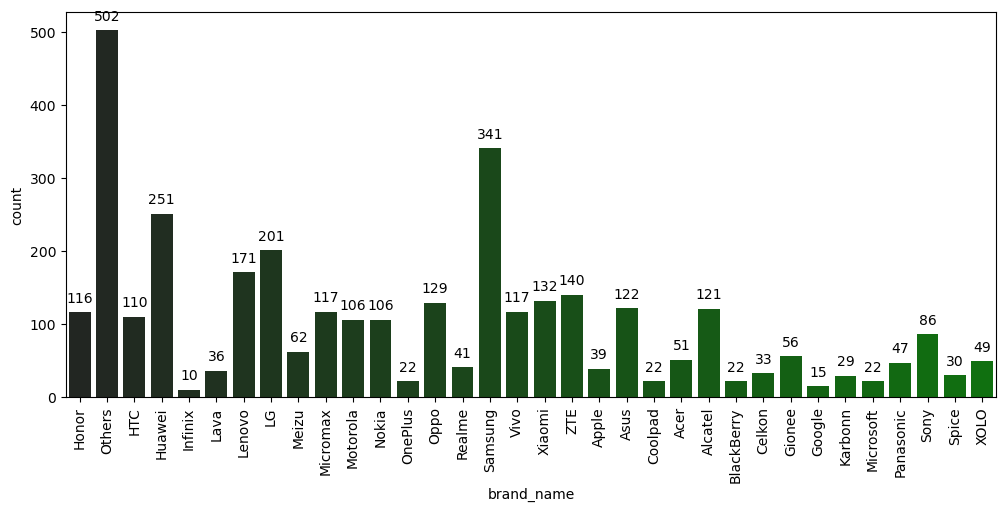

In [26]:
plt.figure(figsize=[12,5])
add_counts(sns.countplot(data=df, x='brand_name',hue='brand_name', palette='dark:Green'))
plt.xticks(rotation=90);
calculate_percentage(df['brand_name'])

As we can see here, the mayority of devices are Samsung and Huawei. Other brands not big enough to be counted, still account for almost 14% that is share even bigger than Samsung that is the most common brand.

2. OS



Android: 93.05%
Others: 3.97%
Windows: 1.94%
iOS: 1.04%


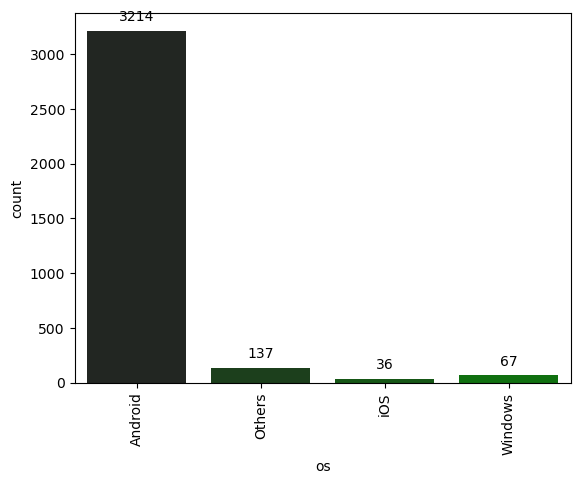

In [29]:
add_counts(sns.countplot(data=df, x='os',hue='os', palette='dark:Green'))
plt.xticks(rotation=90);
# Calculate and print percentages
calculate_percentage(df['os'])

As expected the majority of devices run on Android. Apple devices only accounts for about 1.13% of the total, this explains why iOS is not the most common OS

3. Screen size

The mean for the screen size is 5.40in, or 13.71cm


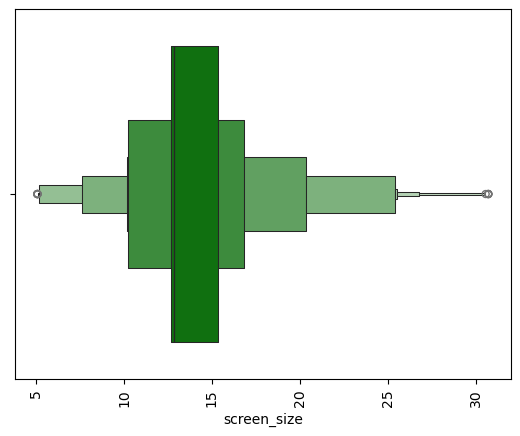

In [32]:
sns.boxenplot(data=df, x='screen_size', color='Green')
plt.xticks(rotation=90);
print(f'The mean for the screen size is {format(df['screen_size'].mean()/2.54,'.2f')}in, or {format(df['screen_size'].mean(),'.2f')}cm')

The average screen size for the devices is 5.40 inches (or 13.71cm). Is interesting that some devices have screens as small as about 5cm.

4. 4g and 5g support

In [35]:
### add graph later
df['4g'].value_counts()

4g
yes    2335
no     1119
Name: count, dtype: int64

In [36]:
df['5g'].value_counts()

5g
no     3302
yes     152
Name: count, dtype: int64

In [37]:
# Check if there are any rows where 5G is 'yes' and 4G is 'no'
inconsistent_support = df[(df['5g'] == 'yes') & (df['4g'] == 'no')]

# Print the result
if inconsistent_support.empty:
    print("All phones that support 5G also support 4G.")
else:
    print("There are phones that support 5G but do not support 4G:")
    print(inconsistent_support)

All phones that support 5G also support 4G.


We can see that the majority of phones support 4g (2335 out 3454) while only a few support 5g (152 out of 3302). It worth to say that phones that support 5g also support 4g. 

5. Main Camera

The mean for the main camera resolution is 9.46MP while the minimum is 0.08MP and the maximum is 48.00MP


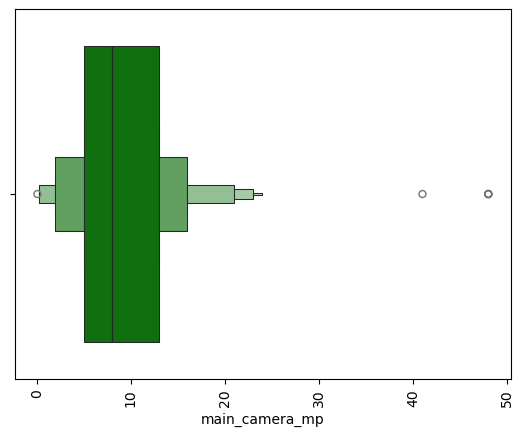

In [40]:
sns.boxenplot(data=df, x='main_camera_mp', color='Green')
plt.xticks(rotation=90);
print(
    f'The mean for the main camera resolution is {format(df['main_camera_mp'].mean(),'.2f')}MP'
    f' while the minimum is {format(df['main_camera_mp'].min(),'.2f')}MP'
    f' and the maximum is {format(df['main_camera_mp'].max(),'.2f')}MP')

6. Selfie Camera

The mean for the selfie camera resolution is 6.55MP while the minimum is 0.00MP and the maximum is 32.00MP


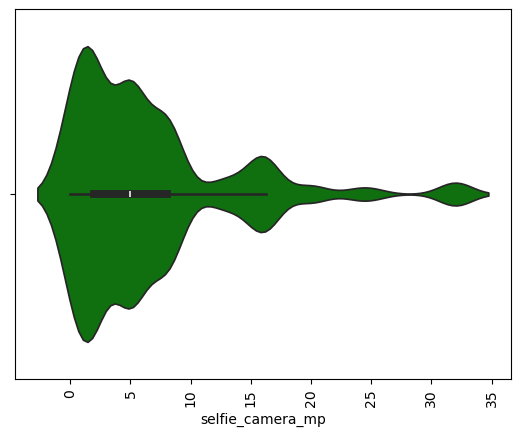

In [42]:
sns.violinplot(data=df, x='selfie_camera_mp', color='Green')
plt.xticks(rotation=90);
print(
    f'The mean for the selfie camera resolution is {format(df['selfie_camera_mp'].mean(),'.2f')}MP'
    f' while the minimum is {format(df['selfie_camera_mp'].min(),'.2f')}MP'
    f' and the maximum is {format(df['selfie_camera_mp'].max(),'.2f')}MP')

7. Internal memory

The mean for the internal memory is 54.57GB while the minimum is 0.01GB and the maximum is 1024.00GB


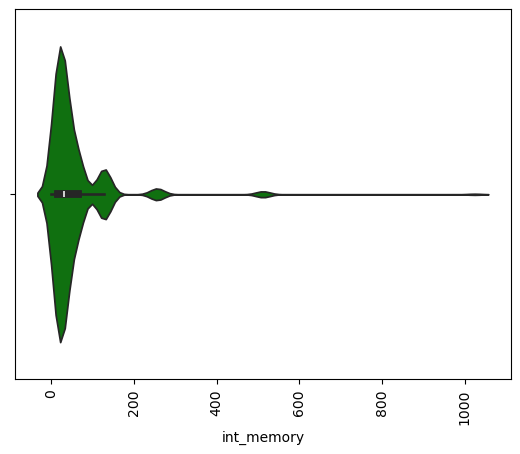

In [44]:
sns.violinplot(data=df, x='int_memory', color='Green')
plt.xticks(rotation=90);
print(
    f'The mean for the internal memory is {format(df['int_memory'].mean(),'.2f')}GB'
    f' while the minimum is {format(df['int_memory'].min(),'.2f')}GB'
    f' and the maximum is {format(df['int_memory'].max(),'.2f')}GB')

8. RAM

The mean for the ram is 4.04GB while the minimum is 0.02GB and the maximum is 12.00GB


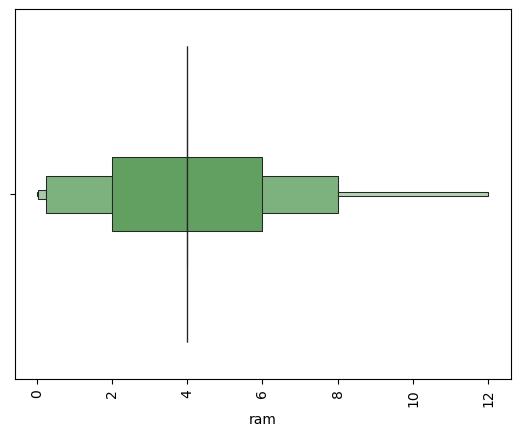

In [46]:
sns.boxenplot(data=df, x='ram', color='Green')
plt.xticks(rotation=90);
print(
    f'The mean for the ram is {format(df['ram'].mean(),'.2f')}GB'
    f' while the minimum is {format(df['ram'].min(),'.2f')}GB'
    f' and the maximum is {format(df['ram'].max(),'.2f')}GB')

9. Battery

The mean battery is 3133.40mAh while the minimum is 500.00mAh and the maximum is 9720.00mAh


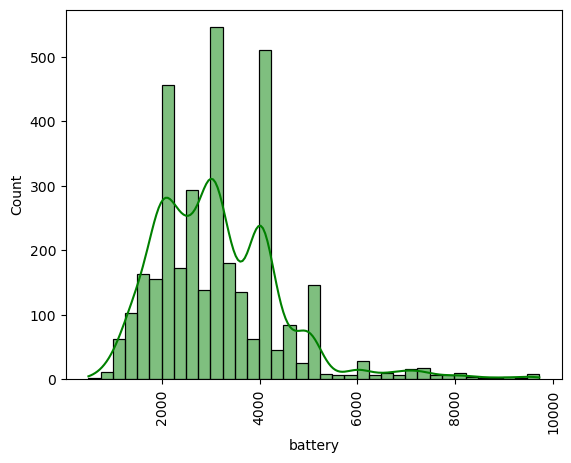

In [48]:
sns.histplot(data=df, x='battery', color='Green', kde=True)
plt.xticks(rotation=90);
print(
    f'The mean battery is {format(df['battery'].mean(),'.2f')}mAh'
    f' while the minimum is {format(df['battery'].min(),'.2f')}mAh'
    f' and the maximum is {format(df['battery'].max(),'.2f')}mAh')

10. Weight

The mean weight is 182.75grams while the minimum is 69.00grams and the maximum is 855.00grams


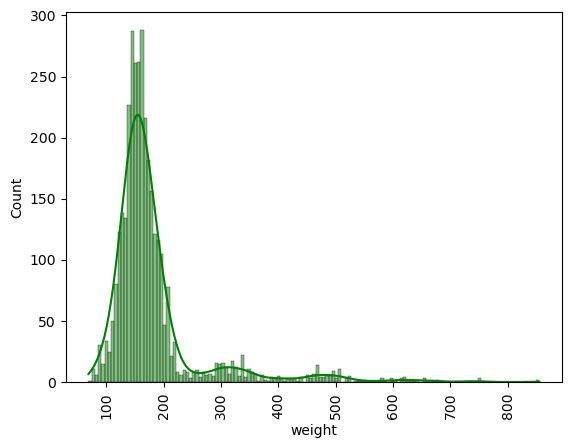

In [50]:
sns.histplot(data=df, x='weight', color='Green', kde=True)
plt.xticks(rotation=90);
print(
    f'The mean weight is {format(df['weight'].mean(),'.2f')}grams'
    f' while the minimum is {format(df['weight'].min(),'.2f')}grams'
    f' and the maximum is {format(df['weight'].max(),'.2f')}grams')

11. Release year

2014: 18.59%
2013: 16.50%
2015: 14.91%
2019: 12.91%
2016: 11.09%
2018: 9.32%
2017: 8.66%
2020: 8.02%


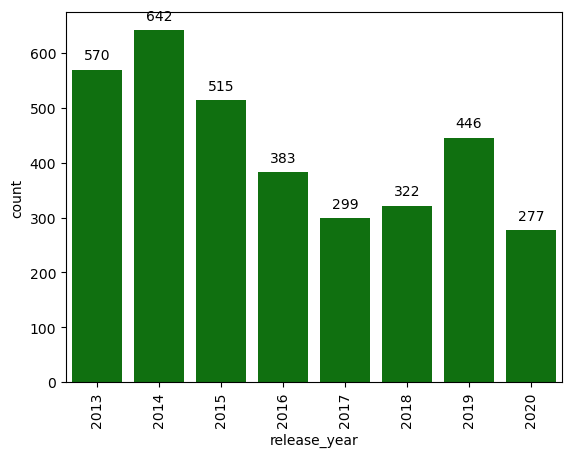

In [52]:
add_counts(sns.countplot(data=df, x='release_year', color='Green'))
plt.xticks(rotation=90);
calculate_percentage(df['release_year'])

Considering that 2021 is the year that the data was collected, the newest phones offered are about 1 year old, that only represent about 8% of the total. The great majority of phones are 4 years old or older

12. Days used

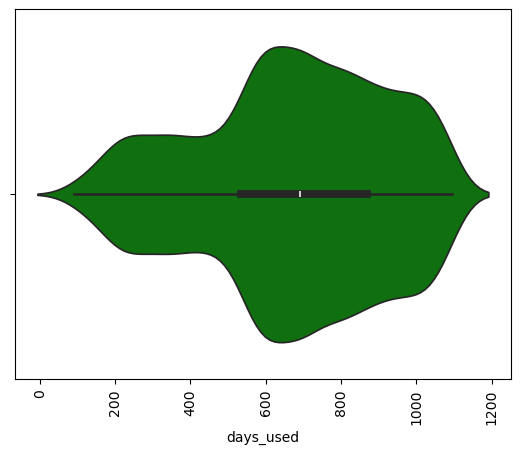

In [55]:
sns.violinplot(data=df, x='days_used', color='Green')
plt.xticks(rotation=90);

In concordance with the previous column the average days used are about 700 days (that is about 2 years).

13. Normalized New Price

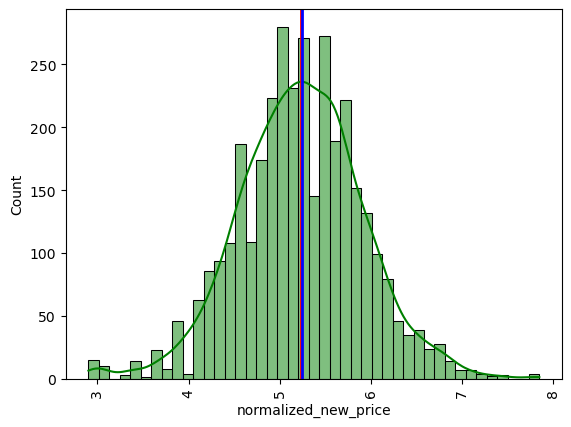

In [58]:
sns.histplot(data= df, x='normalized_new_price',color='Green', kde=True);
plt.xticks(rotation=90);
plt.axvline(df['normalized_new_price'].mean(), color='red', linestyle='-', linewidth=2);
plt.axvline(df['normalized_new_price'].median(), color='blue', linestyle='-', linewidth=2);

14. Normalized Used Price

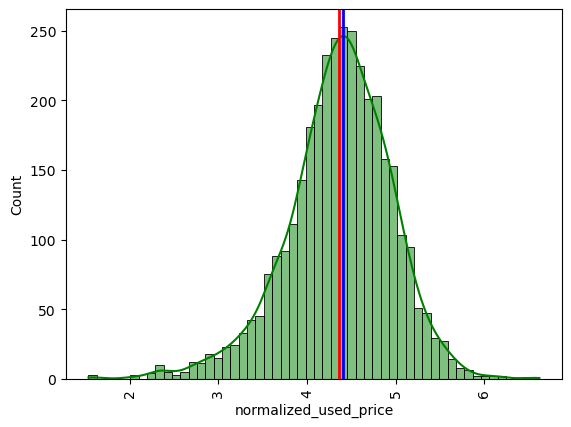

In [60]:
sns.histplot(data= df, x='normalized_used_price',color='Green', kde=True);
plt.xticks(rotation=90);
plt.axvline(df['normalized_used_price'].mean(), color='red', linestyle='-', linewidth=2);
plt.axvline(df['normalized_used_price'].median(), color='blue', linestyle='-', linewidth=2);

## Bivariate Analysis

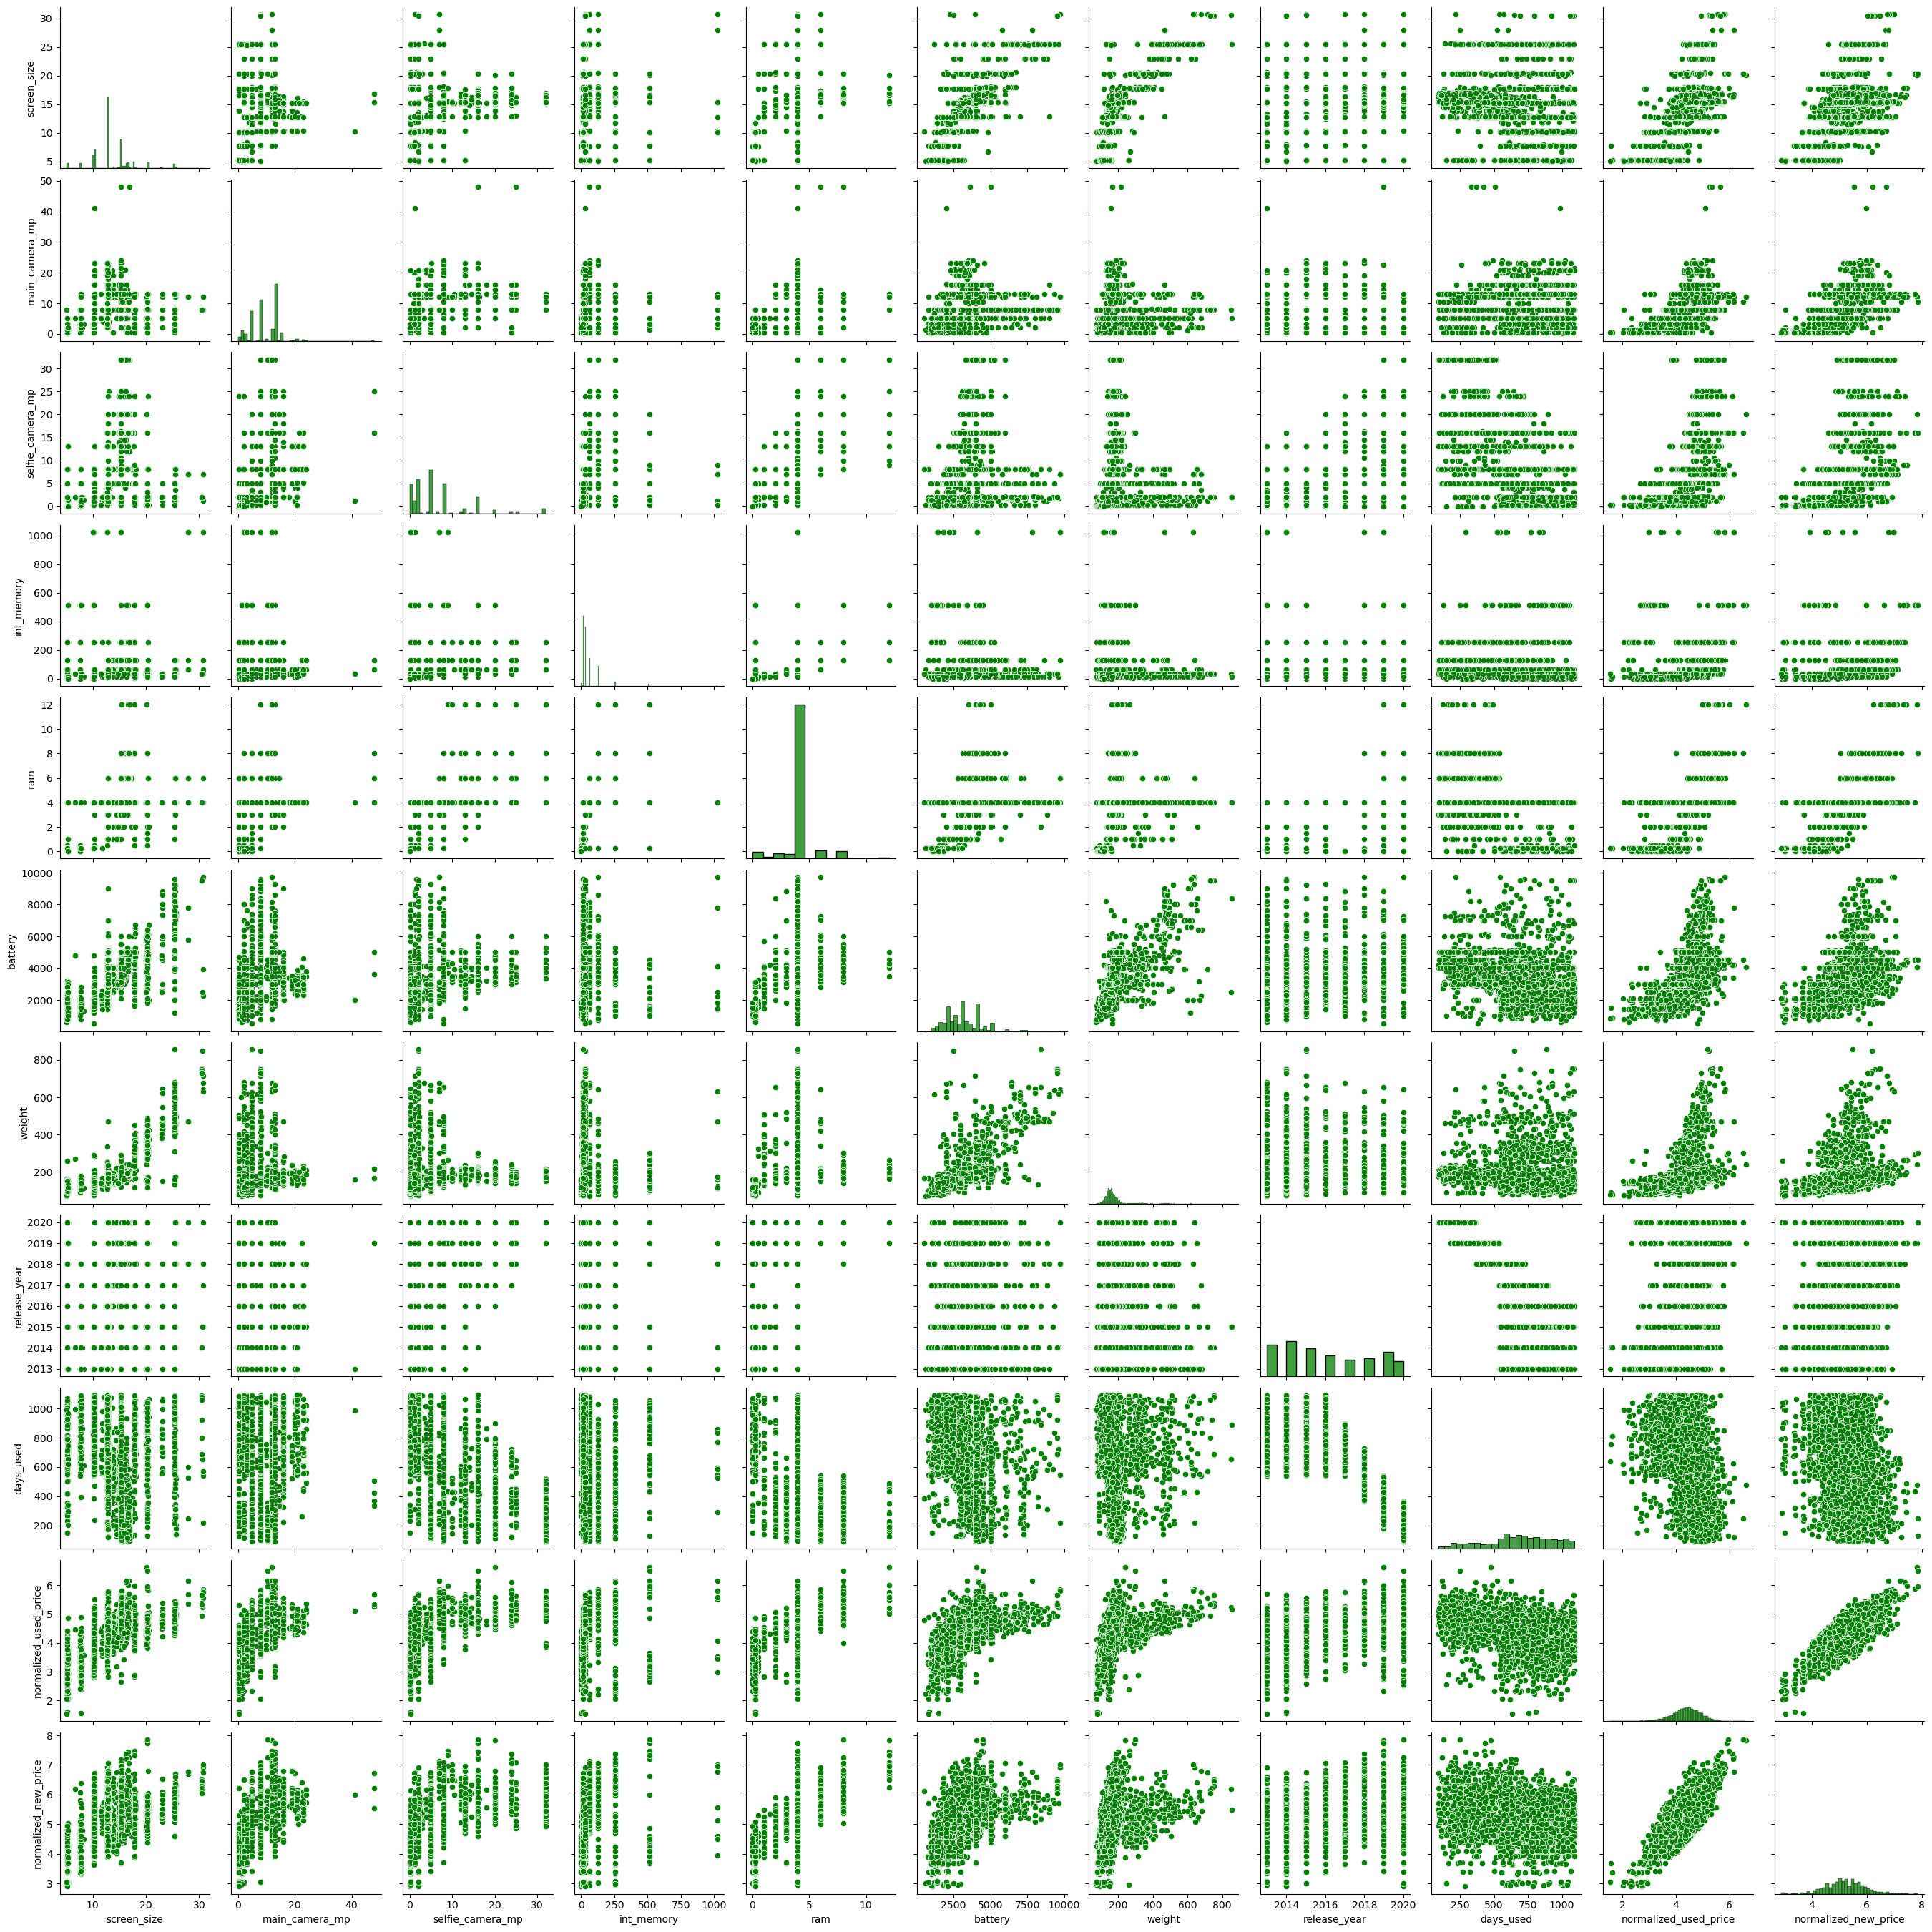

In [62]:
sns.pairplot(data= df,plot_kws={'color': 'green'}, diag_kws={'color': 'green'});

At first glance, it seems that there are some positive relationships between certain variables, such as:

Screen size and battery

Battery and weight

Weight and screen size

Normalized used price and normalized new price

Surprisingly, the year date in the raw data seems to have no relation with price as we might expect, but this needs to be investigated further. Another reasonable assumption is that phones released in later years (newer phones) generally have fewer usage days compared to older phones, as expected.

Another potentially important relationship is that the price seems to be related in some way to the screen size of the device, the RAM, and to some extent, the resolutions of the main and selfie cameras, as well as possibly the battery capacity.

As before, all these conjectures need to be checked and validated, as the data has some missing values that might interfere with our predictions.

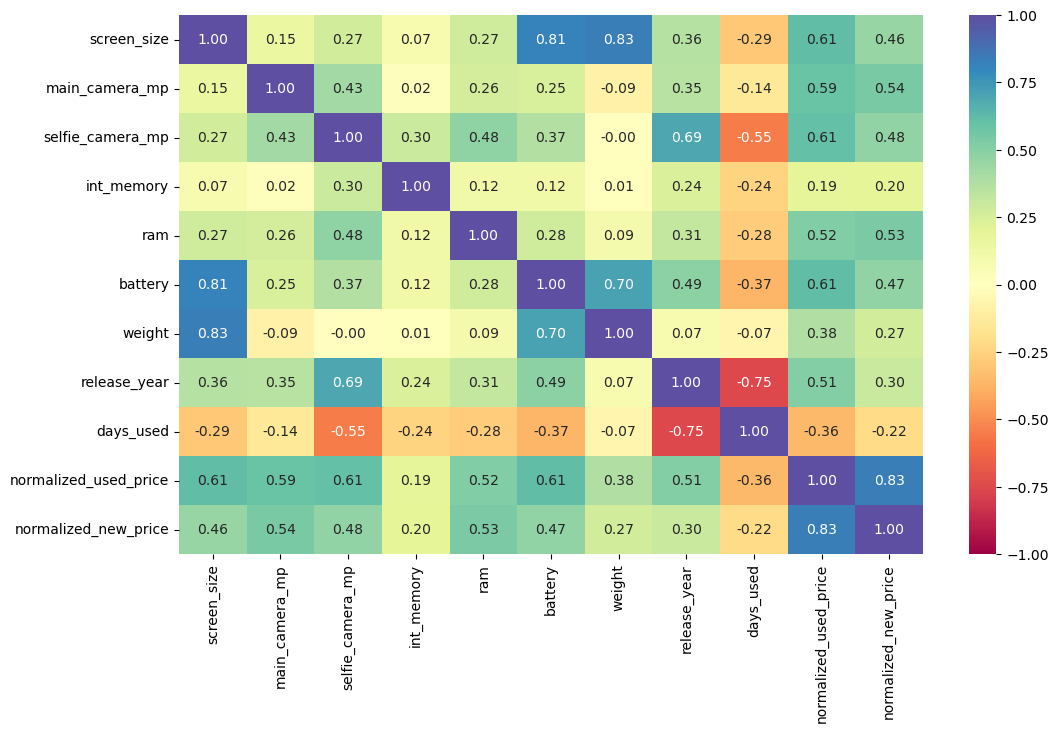

In [64]:
df_heat = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[df_heat].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

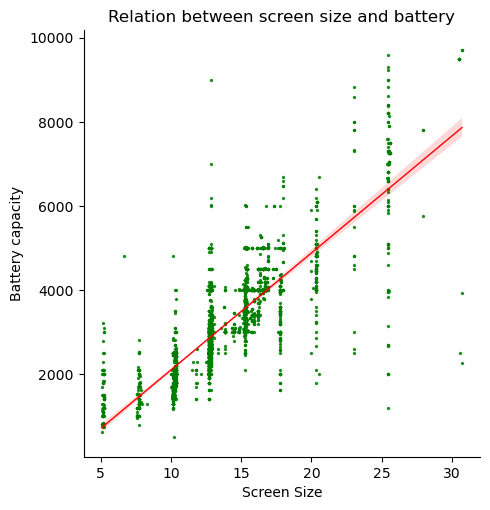

In [272]:
sns.lmplot(data= df, x='screen_size', y='battery', scatter_kws={'color': 'green', 's':2}, line_kws={'color': 'red', 'linewidth':1});
plt.title('Relation between screen size and battery')
plt.xlabel('Screen Size')
plt.ylabel('Battery capacity');

As expected bigger screens relate with bigger batteries as the size of the device increasing there is more room for bigger batteries.

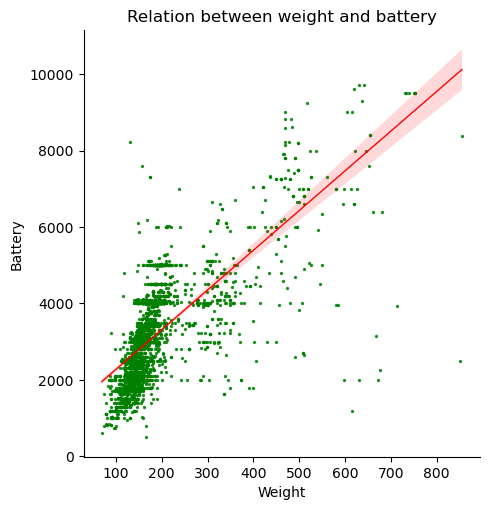

In [67]:
sns.lmplot(data= df, x='weight', y='battery',scatter_kws={'color': 'green', 's':2}, line_kws={'color': 'red', 'linewidth':1});
plt.title('Relation between weight and battery');
plt.xlabel('Weight') ;
plt.ylabel('Battery');

As expected, bigger batteries relate with heavier devices.

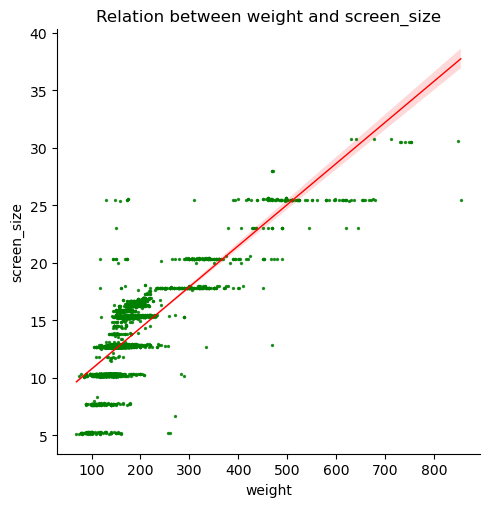

In [274]:
sns.lmplot(data= df, x='weight', y='screen_size',scatter_kws={'color': 'green', 's':2}, line_kws={'color': 'red', 'linewidth':1});
plt.title('Relation between weight and screen_size')
plt.xlabel('weight') 
plt.ylabel('screen_size');

As before, it seems to be a reasonable positive relation between the weight of the device and the screen size

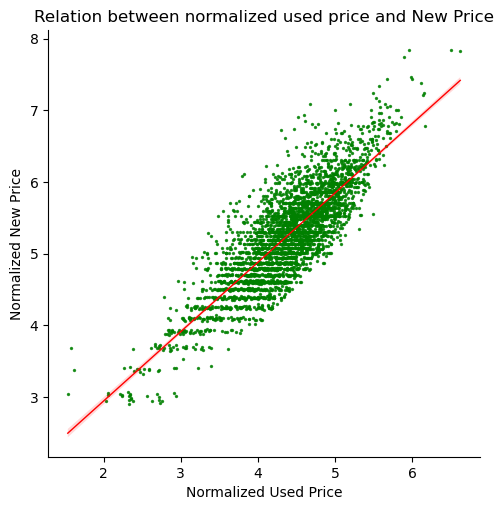

In [276]:
sns.lmplot(data= df, x='normalized_used_price', y='normalized_new_price',scatter_kws={'color': 'green', 's':2}, line_kws={'color': 'red', 'linewidth':1});
plt.title('Relation between normalized used price and New Price')
plt.xlabel('Normalized Used Price') 
plt.ylabel('Normalized New Price');

There seems to be a positive relation between normalized used prices and new prices.

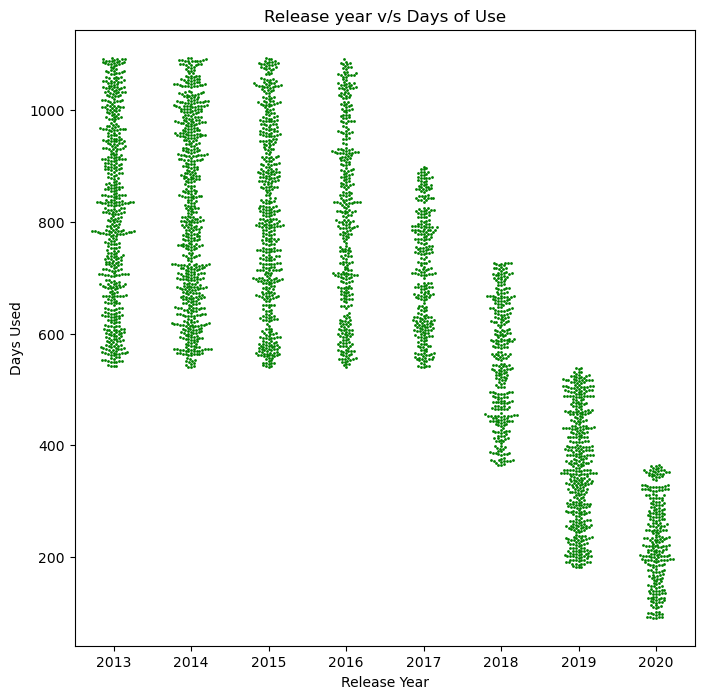

In [73]:
plt.figure(figsize=[8,8])
plt.title('Release year v/s Days of Use')
plt.xlabel('Release Year') 
plt.ylabel('Days Used')
sns.swarmplot(data=df, x='release_year', y='days_used', orient='v',size=2, color='Green');

As expected newer phones has in general less usage than older phones.

The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

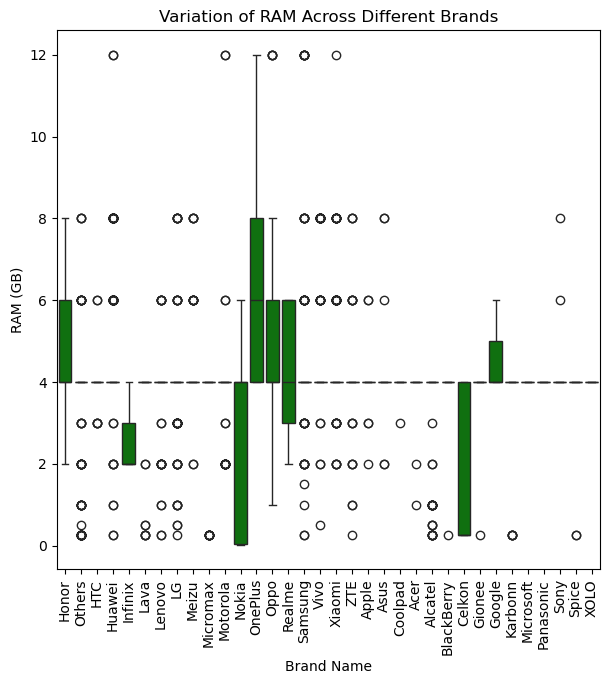

In [76]:
plt.figure(figsize=[7,7])
plt.title('Variation of RAM Across Different Brands')
plt.xlabel('Brand Name') 
plt.ylabel('RAM (GB)')
sns.boxplot(data=df, y='ram', x='brand_name', color='green')
plt.xticks(rotation=90);

Some brands seems to have devices with multiple sizes of RAM, while some other offers their devices with only a fixed set of RAM,

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [79]:
df_battery_weigth = df[df['battery'] > 4500 ]
df_battery_weigth['weight'].describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

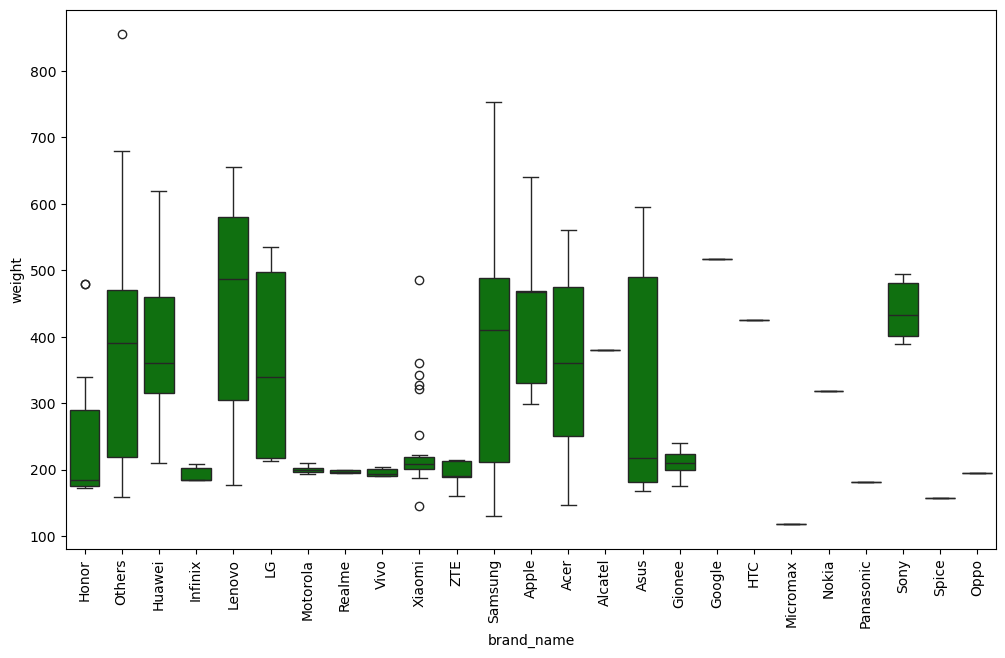

In [80]:
plt.figure(figsize=[12,7])
sns.boxplot(data= df_battery_weigth, x='brand_name', y='weight',color='green');
plt.xticks(rotation=90);

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [82]:
df_big_screens = df[df['screen_size'] > 6 * 2.54]
df_big_screens.shape[0]

1099

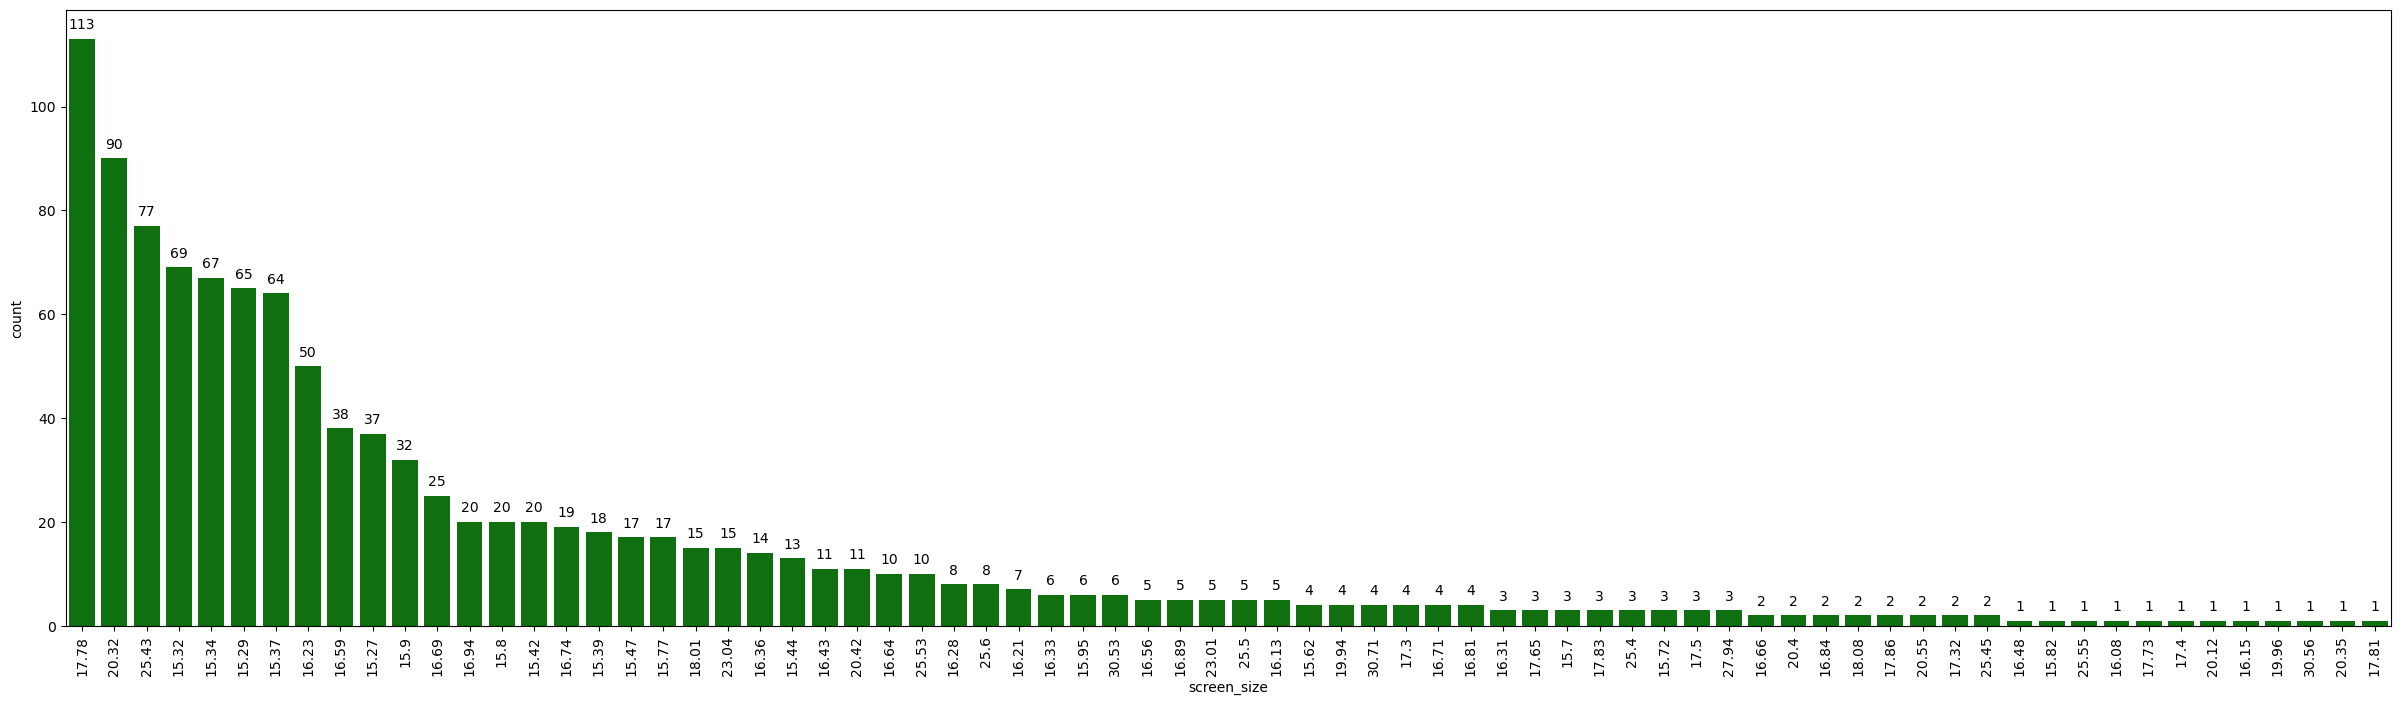

In [83]:
plt.figure(figsize=[30,8])
order = df_big_screens['screen_size'].value_counts().index
add_counts(sns.countplot(data=df_big_screens, x='screen_size', order=order, color='green'))
plt.xticks(rotation=90)
plt.show()

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [85]:
df_8mp = df[df['selfie_camera_mp'] > 8]
df_8mp.shape[0]

655

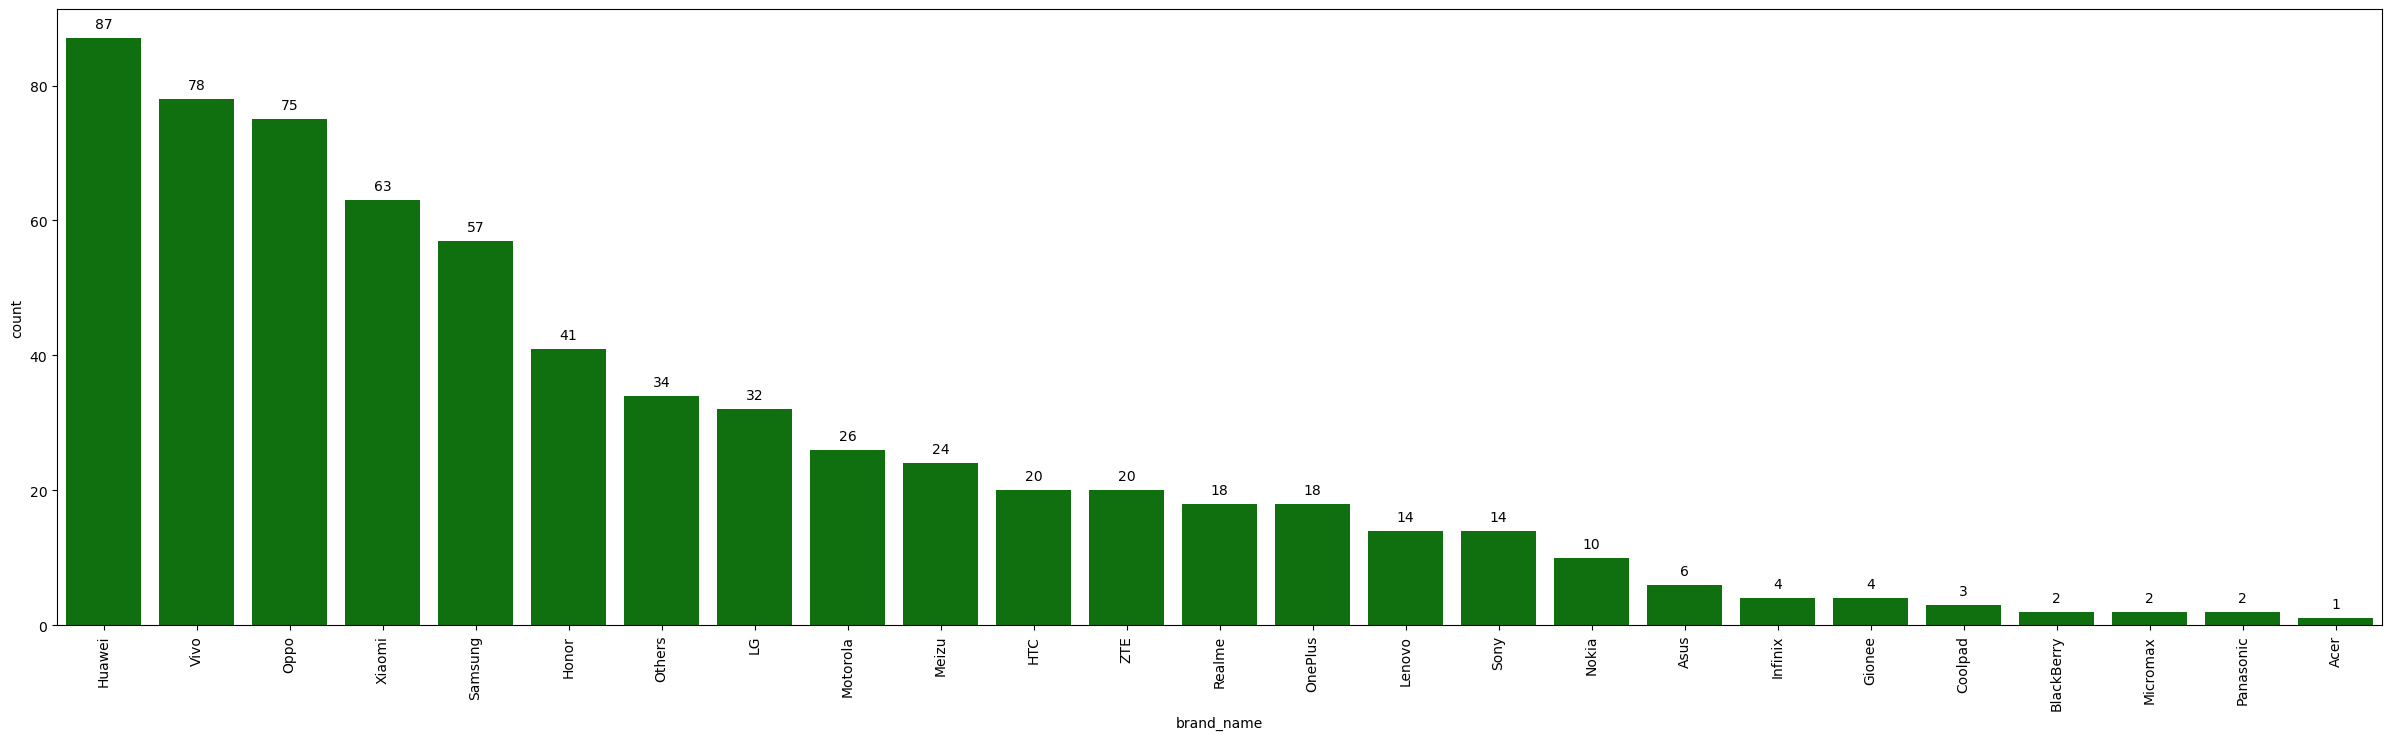

In [86]:
# Calculate the count of selfie_camera_mp for each brand
brand_order = df_8mp['brand_name'].value_counts().index
plt.figure(figsize=[30,8])
add_counts(sns.countplot(data=df_8mp, x='brand_name', order=brand_order, color='green'))
plt.xticks(rotation=90)
plt.show()

**Questions**:

1. What does the distribution of normalized used device prices look like?

   Distribution of used prices looks almost normal with a minimal left skewerness.
   
3. What percentage of the used device market is dominated by Android devices?

   93.05% of the phones have Android as their OS.
   
5. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

   Some brands seems to have devices with multiple sizes of RAM, while some other offers their devices with only a fixed set of RAM.
   

7. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

   There are 341 devices with more than 4500mAh. The mean weight for them is 332. While the minimum weight is 118g and the maximum is 855 grams.

   
9. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

    There are a total of 1099 devices with screens biger than 6 inches. Of these the majority of the devices are the ones with a 7 inches screen.
    
11. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

    There are 655 devices with a selfie camera of 8MP or better. Of these the majority of devices are the HUAWEI, VIVO or Oppo devices.

    
13. Which attributes are highly correlated with the normalized price of a used device?
    According to our heatmap, the raw data suggest that a high correlation between the normalized used device price with the normalized new price, the screen size, both cameras and the battery size. The relation as discussed before between battery and screen size can be redundant, so further analysis may be needed.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [90]:
# Copying data in a new data frame that will be modified
df_2 = df.copy()

df_2.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [91]:
#Selecting columns that needs to be imputed (fill with data)
columns_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

# Group by 'brand' and 'year of release' and fill missing values with the median
df_2[columns_to_impute] = df_2.groupby(['brand_name', 'release_year'])[columns_to_impute].transform(lambda x: x.fillna(x.median()))

# Check if missing values are filled
print(df_2.isnull().sum())

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [92]:
# filling more missing values this time only with brand name
columns_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']
df_2[columns_to_impute] = df_2.groupby(['brand_name'])[columns_to_impute].transform(lambda x: x.fillna(x.median()))
print(df_2.isnull().sum())

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


In [93]:
#filling more missing values that weren't imputed before with the median of the column
df_2['main_camera_mp'] = df_2['main_camera_mp'].fillna(df_2['main_camera_mp'].median())
print(df_2.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


In [94]:
# To avoid creating multiple dummy columns for each year of the release date to be used in the model,
# a new column representing the number of years since release will be created. As the data was collected in 2021,
# that year will be used as the 'current year' ('0 years old').

df_2['years_of_release'] = 2021 - df_2['release_year']

In [95]:
df_2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_of_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1


In [96]:
#checking basic information about the new column
df_2['years_of_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_of_release, dtype: float64

In [97]:
# Since the 'release_year' column is already represented in the new column,
# it can be safely dropped.
df_2 = df_2.drop('release_year', axis=1)

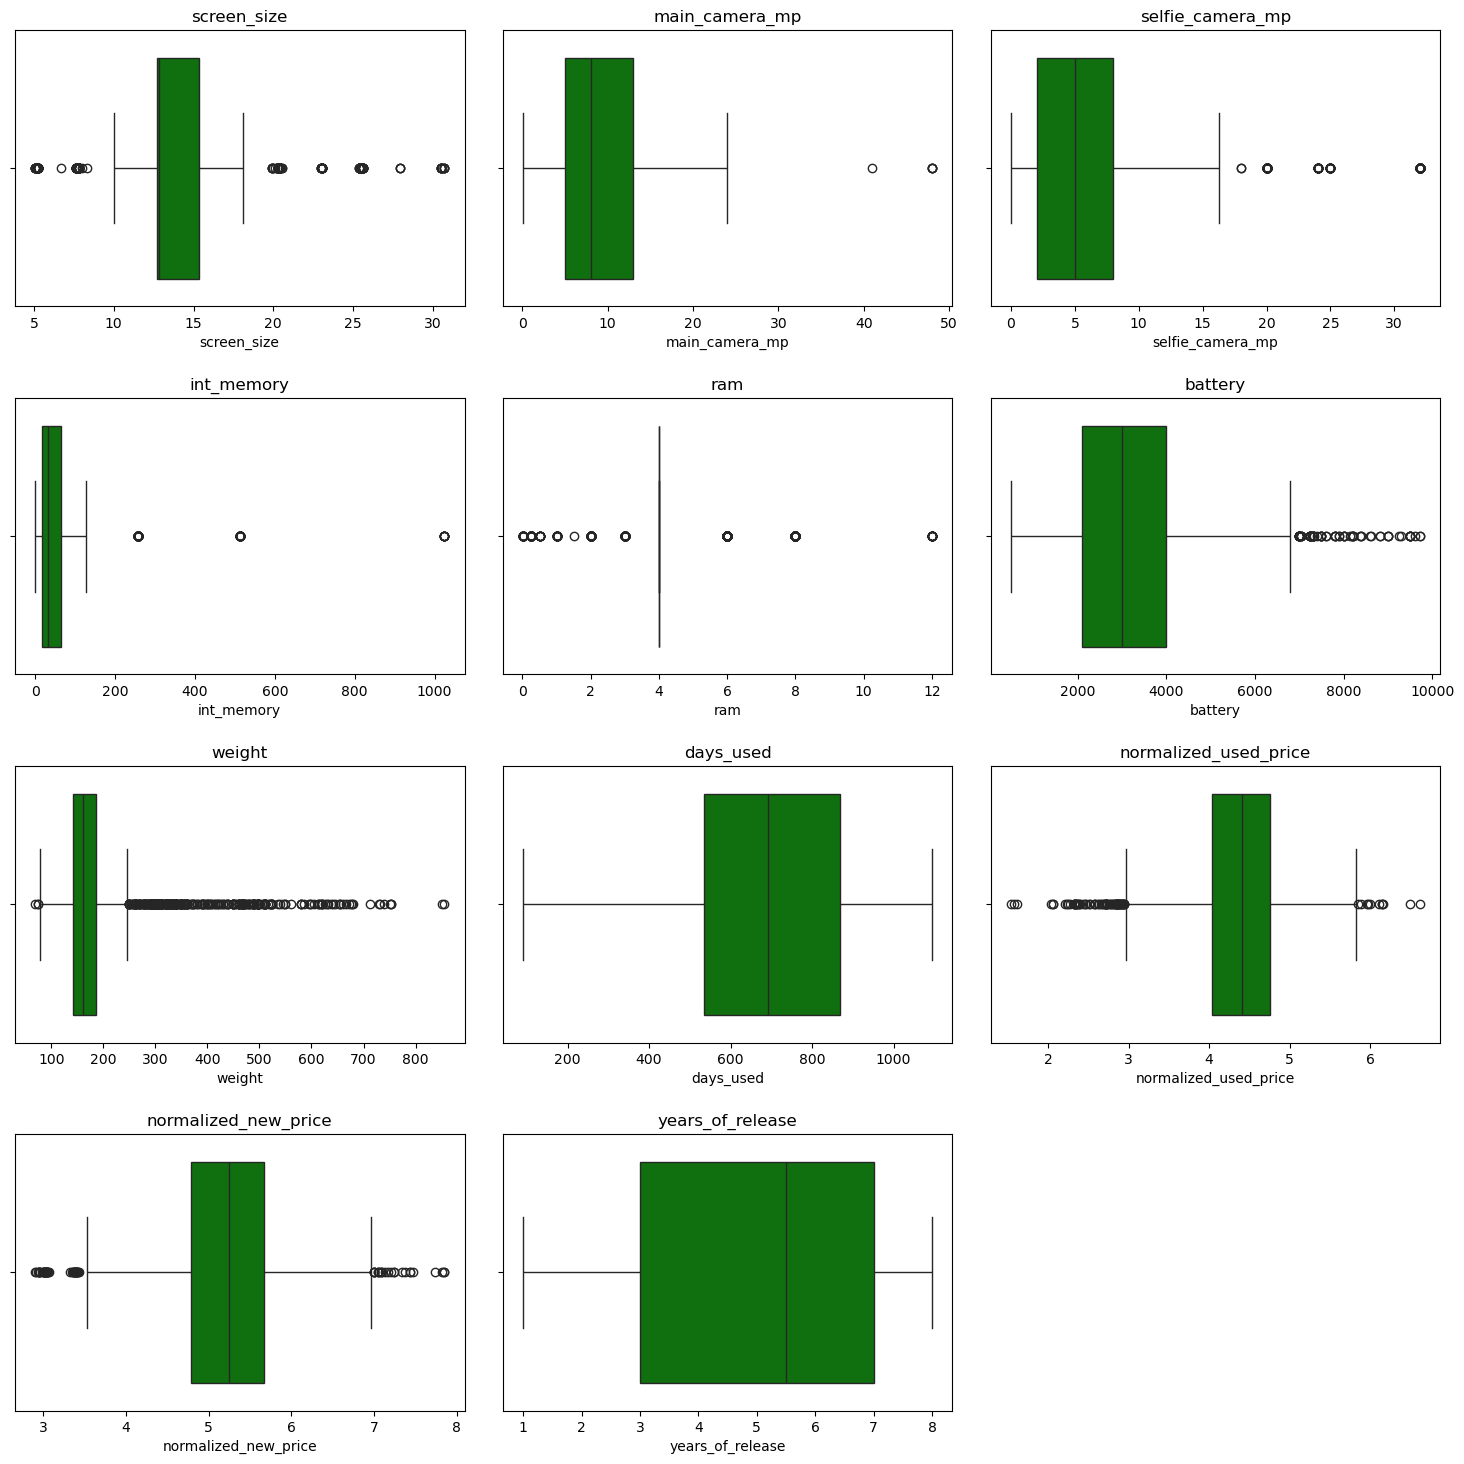

In [98]:
# Select numeric columns 
num_cols = df_2.select_dtypes(include='number').columns.tolist() 
# Create boxplots for each numeric column 
plt.figure(figsize=(15, 15)) 
for i, variable in enumerate(num_cols): 
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1) 
    sns.boxplot(data=df_2, x=variable, color='green') 
    plt.title(variable) 
    plt.tight_layout(pad=2)

plt.show()

All the data seems to be within normal values. Outliers are values that are also within normal values of these devices specifications.

## EDA

- It is a good idea to explore the data once again after manipulating it.

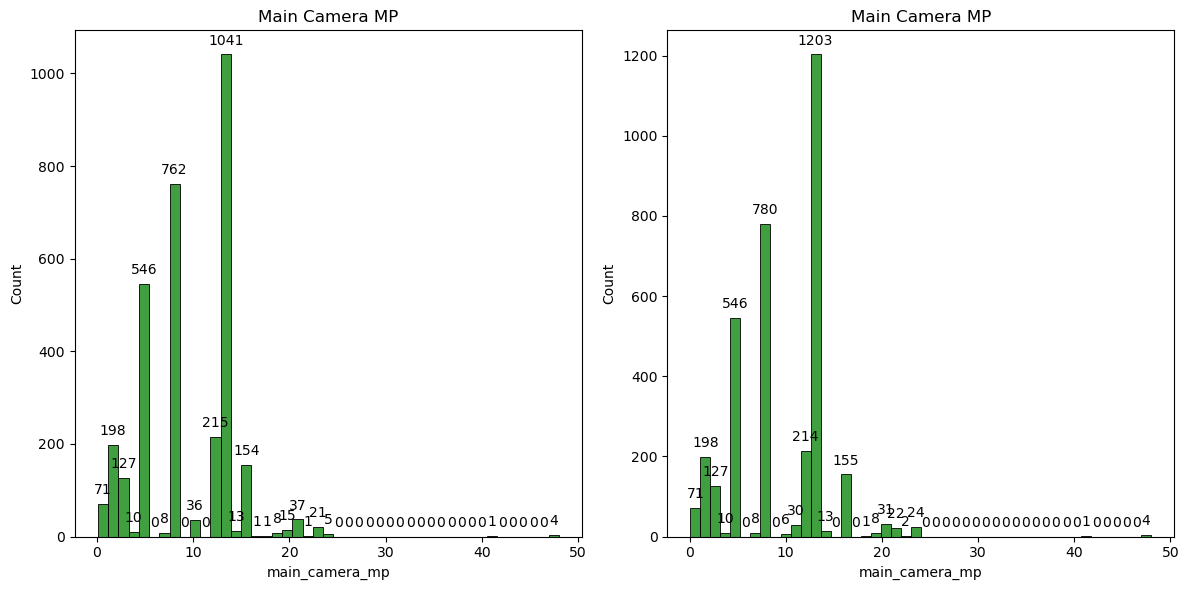

9.460207633587787 9.617596988998265


In [102]:
#Checking changes of distribution and mean values of main camera
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
add_counts(sns.histplot(data=df, x='main_camera_mp', color='green'))
plt.title('Main Camera MP')
plt.subplot(1, 2, 2)
add_counts(sns.histplot(data=df_2, x='main_camera_mp', color='green'))
plt.title('Main Camera MP')
plt.tight_layout()
plt.show()
print(df['main_camera_mp'].mean(), df_2['main_camera_mp'].mean())

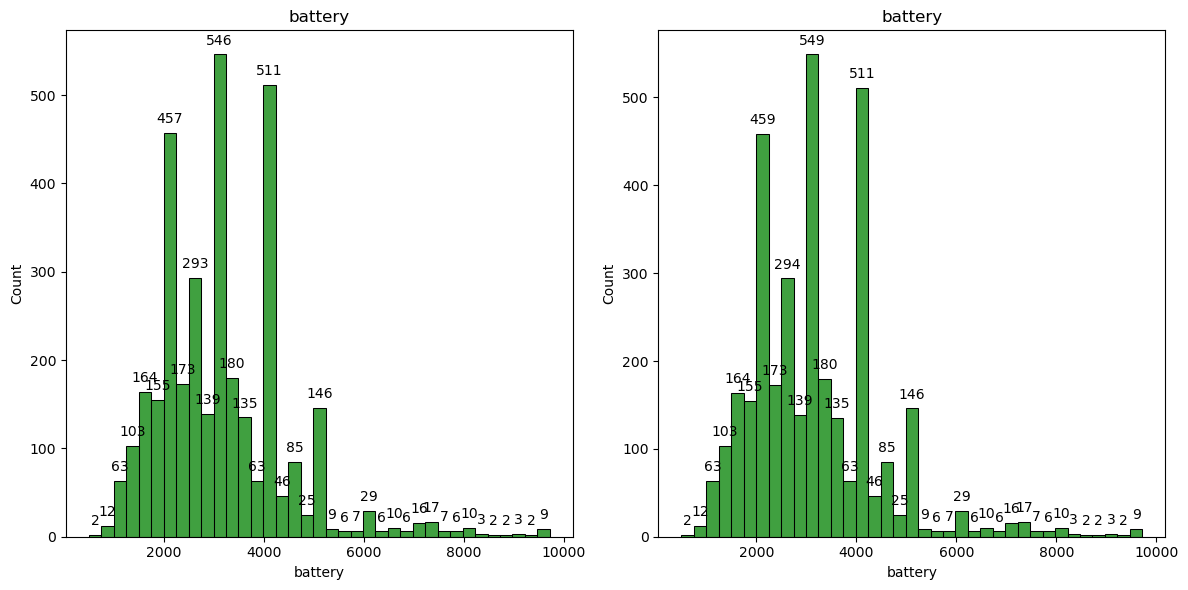

3133.402697215777 3132.5774464389115


In [103]:
#Checking changes of distributation and mean values of battery
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
add_counts(sns.histplot(data=df, x='battery', color='green'))
plt.title('battery')
plt.subplot(1, 2, 2)
add_counts(sns.histplot(data=df_2, x='battery', color='green'))
plt.title('battery')
plt.tight_layout()
plt.show()

print(df['battery'].mean(), df_2['battery'].mean())

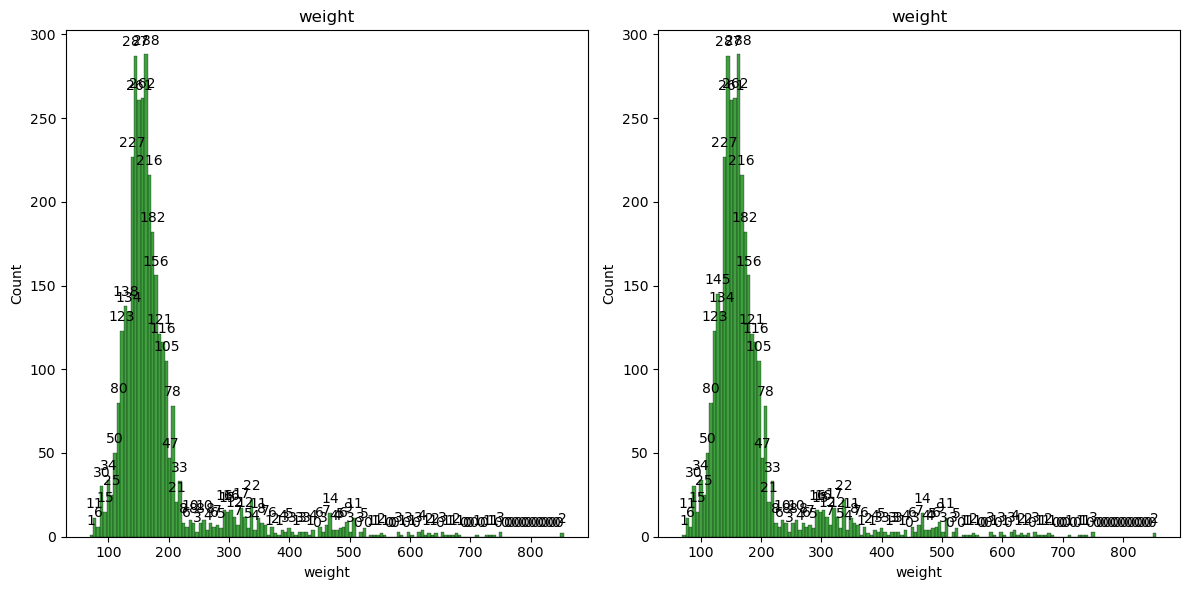

182.75187119234116 182.63685581933987


In [104]:
#Checking changes of distributation and mean values of weight
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
add_counts(sns.histplot(data=df, x='weight', color='green'))
plt.title('weight')
plt.subplot(1, 2, 2)
add_counts(sns.histplot(data=df_2, x='weight', color='green'))
plt.title('weight')
plt.tight_layout()
plt.show()
print(df['weight'].mean(), df_2['weight'].mean())

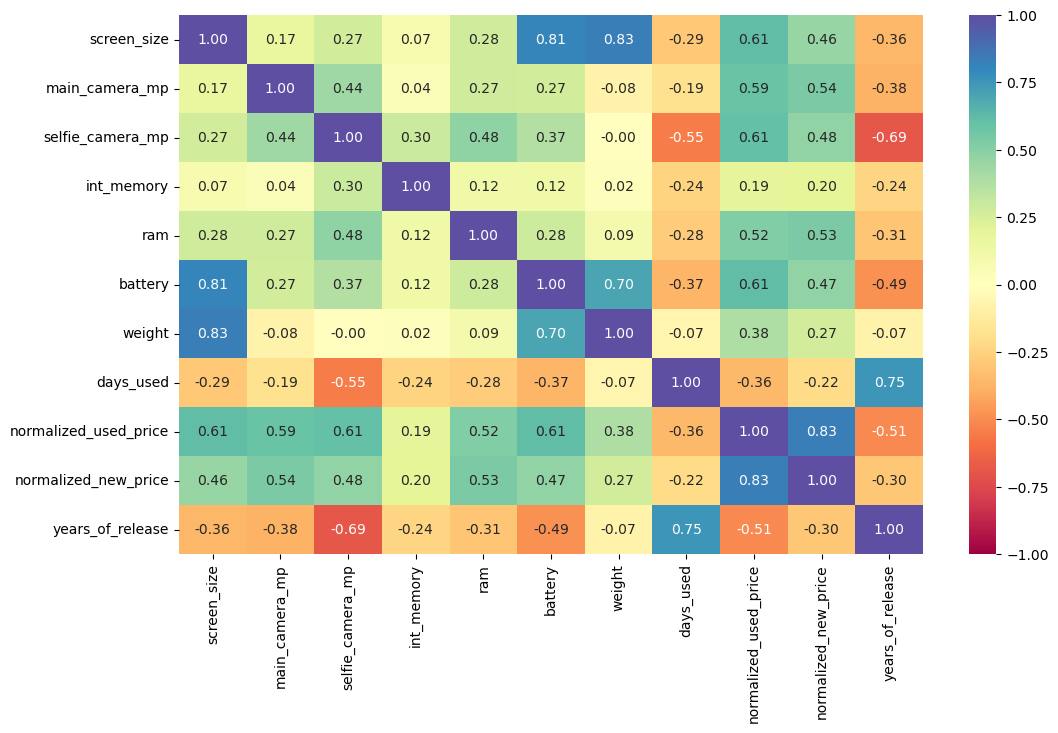

In [105]:
#Checking ne
df_heat_2 = df_2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_2[df_heat_2].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

As expected, the relationship between the normalized used price and the year of release is inverted now that we have the years_of_release column. What was previously a positive relationship is now negative, as the column represents the same information but in an opposite way.

## Model Building - Linear Regression

In [108]:
# We need to find out how the normalized used price (dependent variable) is related to the other factors
# Dependent Variable
y = df_2['normalized_used_price']
# Independent variables
X = df_2.drop(['normalized_used_price'], axis = 1)
X = sm.add_constant(X)
print(X.head(3))
print('-'*50)
print(y.head(3))

   const brand_name       os  screen_size   4g   5g  main_camera_mp  \
0    1.0      Honor  Android        14.50  yes   no            13.0   
1    1.0      Honor  Android        17.30  yes  yes            13.0   
2    1.0      Honor  Android        16.69  yes  yes            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   

   normalized_new_price  years_of_release  
0              4.715100                 1  
1              5.519018                 1  
2              5.884631                 1  
--------------------------------------------------
0    4.307572
1    5.162097
2    5.111084
Name: normalized_used_price, dtype: float64


In [109]:
# Create dummy variables for all the non-numerical columns
non_numerical = X.select_dtypes(include=["object", "category"]).columns.tolist()
print(non_numerical)
X = pd.get_dummies(X, columns=non_numerical, drop_first=True)

['brand_name', 'os', '4g', '5g']


In [110]:
# Splitting data into train and test sub-sets of data. Using a 70%-30% ratio. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [111]:
X_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,...,False,False,True,False,False,False,False,False,False,False
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,...,False,False,False,False,False,False,False,False,True,False
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,...,False,False,False,False,False,False,False,False,False,False
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,...,False,False,True,False,False,False,False,False,True,False
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,...,False,False,False,False,False,False,False,False,True,False


In [112]:
# Convert all False and True values to 0 and 1
X_train = X_train.map(lambda x: 1 if x is True else (0 if x is False else x))

# Check the resulting DataFrame
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0        819              4.796204  ...                 0   
1525   4050.0   225.0        585              5.434595  ...                 0   
1128   2550.0   162.0        727              5.137914  ...                 0   
3003   3200.0   126.0        800              5.189228  ...                 0   
2907   2900.0   160.0        560              5.016220  ...                 0   

      brand_name_Vivo  brand_name_XOLO

In [113]:
olsmod = sm.OLS(y_train, X_train).fit()

In [114]:
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                           23:41:21   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


We have a preliminary regression (model) that still needs to be depurated in order to eliminate extra variables that can make the model more complicated nod adding any value to it. Aditionally, some lineal assumptioms need to be checked and confirmed.

## Model Performance Check

In [117]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [118]:
print(f'Model Performance on training data:')
olsmod_perfomance_training = model_performance_regression(olsmod, X_train, y_train)
olsmod_perfomance_training

Model Performance on training data:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [119]:
print(f'Model Performance on test data:')
olsmod_perfomance_data = model_performance_regression(olsmod, X_test, y_test)
olsmod_perfomance_data

Model Performance on test data:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


As we can see, the preliminary model is able to predict around 85% of the variance of the data. While checking the model performance the model is showing that is working pretty much the same in the test data and the train data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1) No multicollinearity
2) Linearity of variables
3) Independence of error terms
4) Normality of errors terms
5) No heteroscedasticity

### 1) No Multicollinearity

In [124]:
# Importing needed libraries and formulas to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(X_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


Variables (that are not dummies) with a VIF > 5 indicate that might have some multicolliarity, so they need to be dropped and check if the the performance on the model get affected or not. In this case, the columns screen_size and weight might be highly correlated, as analyzed before.

In [126]:
#Formula to treat multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [127]:
col_list = ['screen_size', 'weight']
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


As the analysis suggests dropping the column screen_size might give better results than dropping the weight one. ( R2 is greater when dropping screen_size and the RMSE also suggest smaller error in the model's predictions).

In [129]:
col_to_drop = 'screen_size'
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_of_release,4.730315


In [130]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                           23:41:22   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


After getting rid of screen_size, the VIF of the other columns remain lower than 5 (except for the dummy ones, that are expected to be higher and not taken care with this analysis). Now, as a second analysis we need to get rid of all the columns which p-value suggests that they are not adding value to the model.

In [132]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Formula to check p-value of columns and drop if higher than 0.05 one by one after rechecking model.
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_of_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [133]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [134]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                           23:41:22   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

After getting rid of all the columns that weren't adding value to the model (p-values > 0.05). We get a new preliminary model. We need to check the performance again

In [136]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [137]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


Still getting pretty good results, as described before.

### 2) Linearity of variables and independence

In [140]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


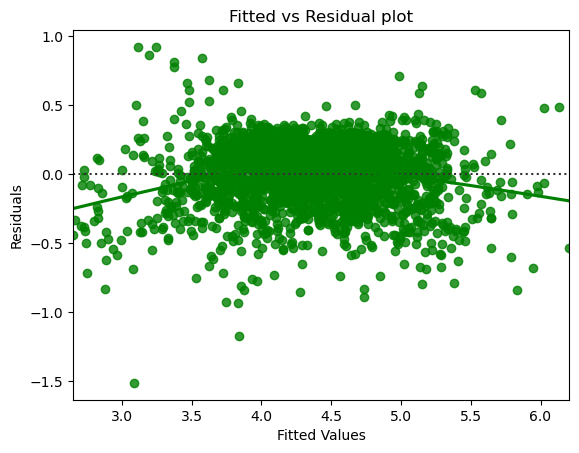

In [141]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

As we can see there is no a pattern in the residuals versus their fitted values, indicating that the model is linear and the residuals are independent.

### 3) Normality

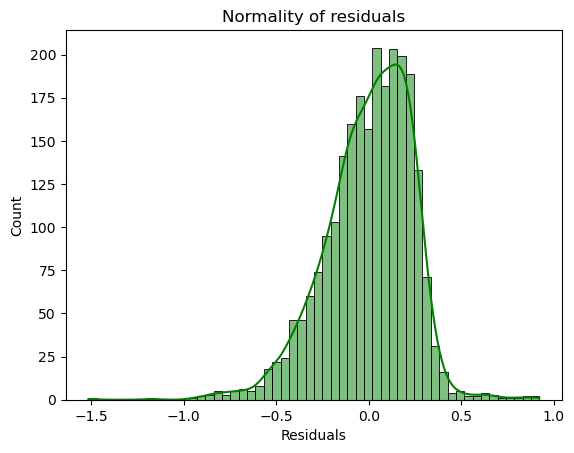

In [144]:
sns.histplot(data=df_pred, x="Residuals", color='green', kde=True)
plt.title("Normality of residuals")
plt.show()

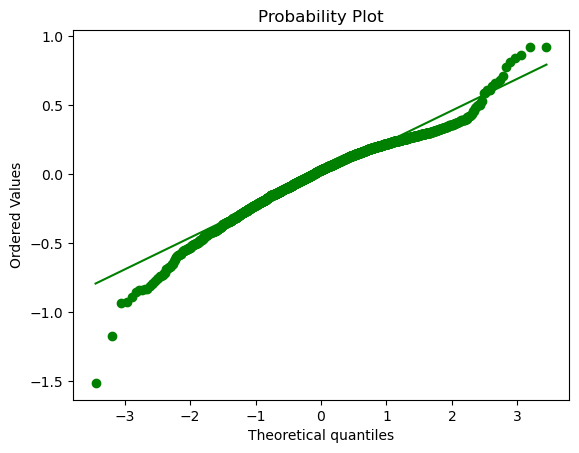

In [145]:
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create the probability plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df_pred["Residuals"], dist="norm", plot=ax)
# Change the color of the plot to green
for line in ax.get_lines():
    line.set_color('green')
plt.show()

In [146]:
shapirotest = stats.shapiro(df_pred["Residuals"])
shapirotest

ShapiroResult(statistic=0.9676950829900562, pvalue=6.983856712608549e-23)

In [147]:
if shapirotest.pvalue < 0.05:
    print('Residuals are not normal')
else:
    print('Residuals are normal')

Residuals are not normal


As the results of the Shapiro test indicate, the residuals are not necesarily normally distributed, but checking both graphs we can assume as an approximation and for the sake of the model, that the residuals follow some normality. 

### 4) Homoscedasticity

In [150]:
# Importing libraries to perform Goldfeld-Quant test.
import statsmodels.stats.api as sms

test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
print(f'F-stat = {test[0]}, p-value = {test[1]}')
if test[1] > 0.05:
    print('Data is homoscedastic')
else:
    print('Data is heteroscedastic')

F-stat = 1.008750419910675, p-value = 0.4401970650664152
Data is homoscedastic


As the p-value happened to be > 0.05, the residuals are homoscedastic per the Goldfeld-Quant test. So we can assumed this requirement is also satisfied

## Final Model

As we were able to get rid of all the non-important data and the linearity assumptioms were tested. We can now present a proper predictive model.

In [154]:
#Checking our last model predicted values versus the actual data in our test dataset
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


As we can see here, the predicted values are pretty close to the real ones, giving the model a good predictive value.

In [156]:
#Copying data from our most recent dataframes into a new variable to avoid unintentional data deletion.
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [157]:
# Final Model fitting
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                           23:41:23   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [158]:
# Checking performance on train data
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [159]:
# Checking performance on test data
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model can explain about 84% of the variation of the data. 

* RMSE and MAE are low and very similar. The model doesn't seem to have any type of overfitting.

* MAPE indicates that predict values with about 4.4% of error. This means the model has a very good predictive accuracy. 

## Actionable Insights and Recommendations

* The model explains a significant portion of the variance in the normalized used price, with several predictors showing statistically significant relationships. The coefficients provide insights into how different features impact the normalized used price, with some variables having a positive effect and others having a negative effect.

* The proposed model is able to predict around 84% of the data variation with an error of about 4.4%, indicating that it can be easily used for prediction and inference.

* According to the model, and as expected, there is a high correlation between the normalized price of a used device and the normalized new price of the device. If all other variables are held constant, an increase of 1 unit in the normalized new price results in an increase of 0.4415 units in the normalized used price.

* Normalized used prices tend to decrease when the devices are made by Samsung or Sony, while the opposite is true for devices made by Xiaomi and Karbonn.

* Normalized used prices tend to be lower when iOS or another OS is installed on the device. As the model predicts, having iOS decreases the price by 0.0900 units, while other OSs decrease it by 0.1276 units, if all other variables are held constant.

* Offering devices with higher RAM and better cameras can be important selling points, and it is recommended to have them in stock.

* Newer phones have better value, as expected. The same applies to phones that are able to retain their value better (devices that have a higher normalized new price).

**Summary**

The following characteristics influence the price.

*Positively:*

Main camera MP, Selfie camera MP, RAM, Weight, Normalized new price, devices made by Karbonn and Xiaomi, 4G capability.

*Negatively:*

Years of release, Devices made by Samsung or Sony, Devices with iOS or other (non-Android) OS, 5G capability

___